In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import c3aidatalake
from preparedata import get_simulation_data


In [3]:
r_confirmed_cases, r_confirmed_deaths, r_confirmed_recoveries, r_infection_rate, r_mortality_rate, \
        r_recovery_rate, r_county_pop, r_prob_visiting_grocery_store, r_prob_visiting_restaurant, r_prob_visiting_park \
= get_simulation_data('Kern_California_UnitedStates','2020-05-01','2020-08-29')

In [75]:
susceptible = [int(0.07*r_county_pop)]*120
activeCases = np.subtract(np.subtract(r_confirmed_cases,r_confirmed_recoveries),r_confirmed_deaths)
Susceptibles = np.subtract(np.subtract(np.subtract(susceptible, activeCases), r_confirmed_recoveries),r_confirmed_deaths)
date_range = len(r_confirmed_cases)


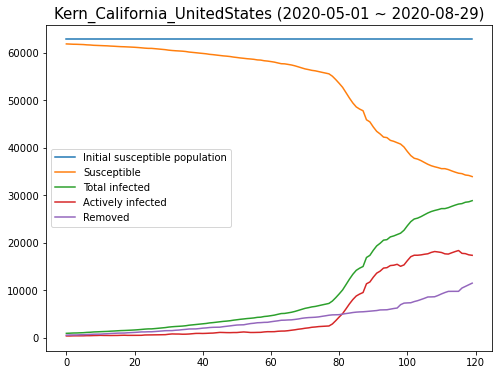

In [78]:
plt.figure(figsize=(8,6))
plt.plot(range(date_range),susceptible, label ='Initial susceptible population')
plt.plot(range(date_range),Susceptibles, label = 'Susceptible')
plt.plot(range(date_range),r_confirmed_cases, label = 'Total infected')
plt.plot(range(date_range),activeCases, label = 'Actively infected')
plt.plot(range(date_range),np.add(r_confirmed_recoveries,r_confirmed_deaths), label = 'Removed')
plt.legend()
plt.title('Kern_California_UnitedStates (2020-05-01 ~ 2020-08-29)', fontsize=15)
plt.show()
#plt.savefig('Kern_0501_0829')